In [1]:
# coding: utf-8

# In[1]:


import fxcmpy
import pandas as pd
import numpy as np
import datetime as dt

from pyti.stochastic import percent_k
from pyti.stochastic import percent_d
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import style
style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [2]:

# In[2]:


socket = fxcmpy.fxcmpy(config_file = 'fxcm.cfg')



In [3]:

# In[3]:


data = socket.get_candles(instrument = 'GBP/USD', period = 'm1', start = dt.datetime(2017,1,1), end = dt.datetime(2017, 1, 6))



In [4]:

# In[4]:

# 1 Hour
data['percent_k'] = percent_k(data['askclose'], 20)
data['percent_d'] = percent_d(data['askclose'], 20)


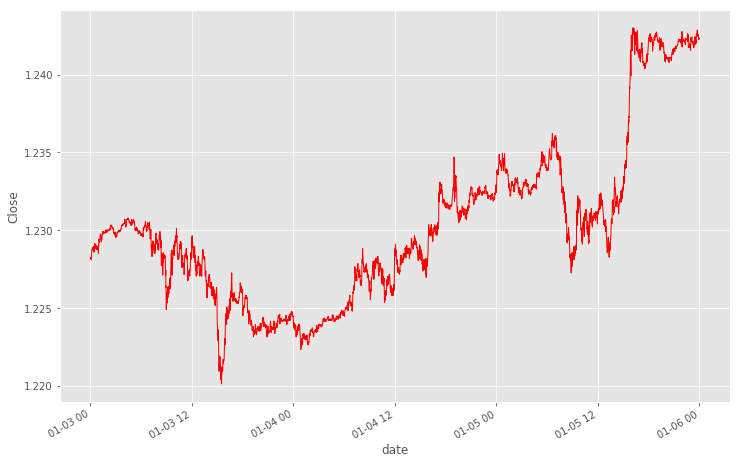

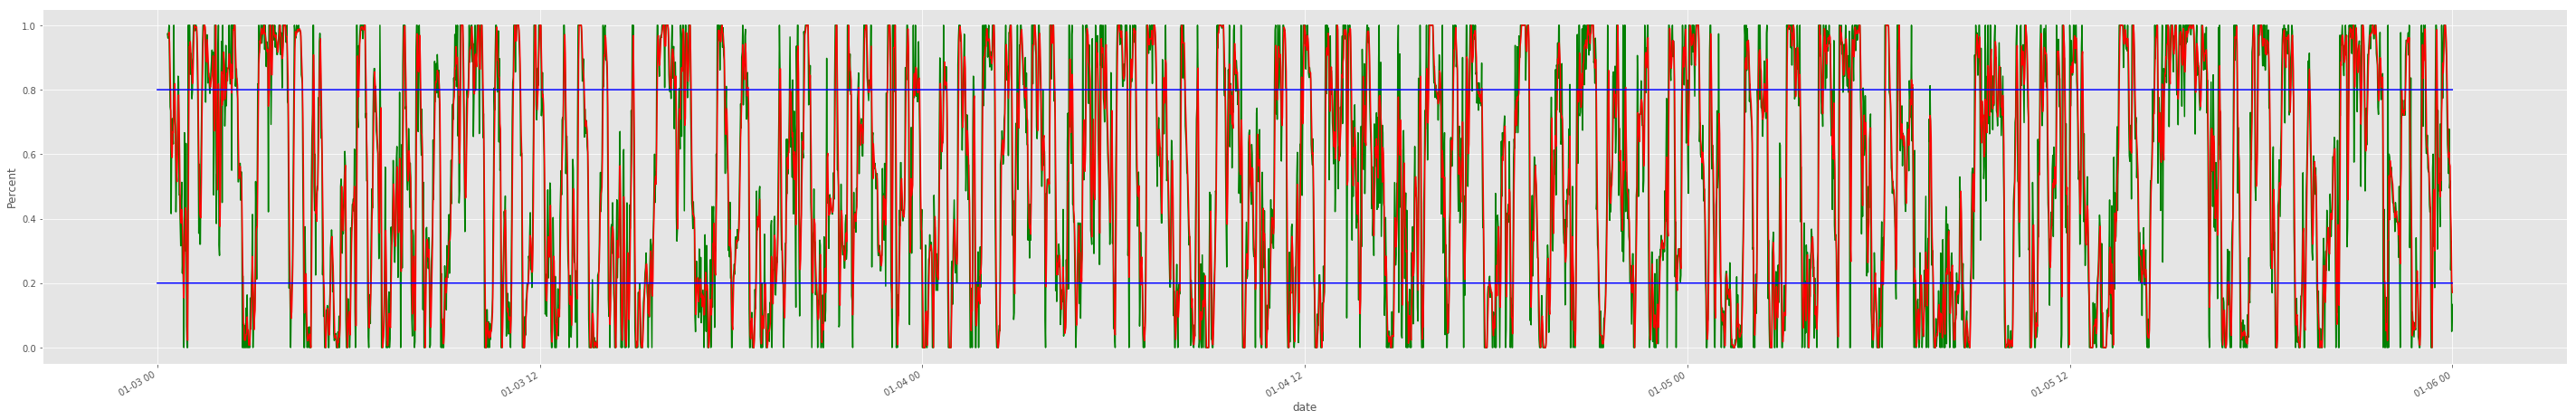

In [5]:

# In[7]:


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111,  xlabel = 'Date',ylabel='Close')
data['askclose'].plot(ax=ax1, color='r', lw=1)

ss_plot = plt.figure(figsize=(50,8))
ax3 = ss_plot.add_subplot(111,  ylabel='Percent')
data['percent_k'].plot(ax=ax3, color='g')
data['percent_d'].plot(ax=ax3, color='r')
data['ovr'] = .80
data['ovr'].plot(ax=ax3, color = 'b', )
data['blw'] = .20
data['blw'].plot(ax=ax3, color = 'b',)



In [6]:

# In[8]:



data['signal'] = np.where(np.logical_and(data['percent_k'] > data['percent_d'], data['percent_k']>.8),1,0)
data['position'] = data['signal'].diff()
data

  

bidopen  bidclose  bidhigh   bidlow  askopen  askclose  \
date                                                                          
2017-01-03 00:00:00  1.23293   1.22791  1.23293  1.22787  1.23476   1.22822   
2017-01-03 00:01:00  1.22791   1.22801  1.22803  1.22788  1.22822   1.22822   
2017-01-03 00:02:00  1.22801   1.22800  1.22802  1.22784  1.22822   1.22821   
2017-01-03 00:03:00  1.22800   1.22790  1.22801  1.22776  1.22821   1.22815   
2017-01-03 00:04:00  1.22790   1.22793  1.22799  1.22788  1.22815   1.22816   
2017-01-03 00:05:00  1.22793   1.22802  1.22804  1.22789  1.22816   1.22828   
2017-01-03 00:06:00  1.22802   1.22789  1.22803  1.22780  1.22828   1.22813   
2017-01-03 00:07:00  1.22789   1.22806  1.22806  1.22771  1.22813   1.22831   
2017-01-03 00:08:00  1.22806   1.22816  1.22816  1.22782  1.22831   1.22840   
2017-01-03 00:09:00  1.22816   1.22835  1.22837  1.22810  1.22840   1.22860   
2017-01-03 00:10:00  1.22835   1.22849  1.22854  1.22834  1.22860   1.22872   
2017-01-03 00:11:00  1.22849   1.22849  1.22850  1.22843  1.22872   1.22870   
2017-01-03 00:12:00  1.22849   1.22850  1.22852  1.22849  1.22870   1.22874   
2017-01-03 00:13:00  1.22850   1.22849  1.22851  1.22848  1.22874   1.22875   
2017-01-03 00:14:00  1.22849   1.22868  1.22870  1.22848  1.22875   1.22888   
2017-01-03 00:15:00  1.22868   1.22862  1.22869  1.22848  1.22888   1.22886   
2017-01-03 00:16:00  1.22862   1.22852  1.22866  1.22849  1.22886   1.22878   
2017-01-03 00:17:00  1.22852   1.22853  1.22873  1.22849  1.22878   1.22877   
2017-01-03 00:18:00  1.22853   1.22859  1.22863  1.22849  1.22877   1.22883   
2017-01-03 00:19:00  1.22859   1.22863  1.22873  1.22848  1.22883   1.22886   
2017-01-03 00:20:00  1.22863   1.22862  1.22864  1.22860  1.22886   1.22885   
2017-01-03 00:21:00  1.22862   1.22860  1.22879  1.22858  1.22885   1.22886   
2017-01-03 00:22:00  1.22860   1.22870  1.22872  1.22858  1.22886   1.22896   
2017-01-03 00:23:00  1.22870   1.22859  1.22870  1.22850  1.22896   1.22885   
2017-01-03 00:24:00  1.22859   1.22850  1.22870  1.22849  1.22885   1.22875   
2017-01-03 00:25:00  1.22850   1.22851  1.22873  1.22848  1.22875   1.22874   
2017-01-03 00:26:00  1.22851   1.22836  1.22852  1.22833  1.22874   1.22858   
2017-01-03 00:27:00  1.22836   1.22851  1.22853  1.22834  1.22858   1.22876   
2017-01-03 00:28:00  1.22851   1.22862  1.22863  1.22851  1.22876   1.22885   
2017-01-03 00:29:00  1.22862   1.22859  1.22864  1.22859  1.22885   1.22883   
2017-01-03 00:30:00  1.22859   1.22859  1.22870  1.22858  1.22883   1.22882   
2017-01-03 00:31:00  1.22859   1.22898  1.22898  1.22858  1.22882   1.22915   
2017-01-03 00:32:00  1.22898   1.22877  1.22908  1.22873  1.22915   1.22901   
2017-01-03 00:33:00  1.22877   1.22874  1.22884  1.22872  1.22901   1.22898   
2017-01-03 00:34:00  1.22874   1.22873  1.22874  1.22867  1.22898   1.22897   
2017-01-03 00:35:00  1.22873   1.22857  1.22881  1.22853  1.22897   1.22882   
2017-01-03 00:36:00  1.22857   1.22862  1.22871  1.22856  1.22882   1.22888   
2017-01-03 00:37:00  1.22862   1.22867  1.22873  1.22860  1.22888   1.22892   
2017-01-03 00:38:00  1.22867   1.22873  1.22874  1.22861  1.22892   1.22897   
2017-01-03 00:39:00  1.22873   1.22883  1.22894  1.22872  1.22897   1.22906   
2017-01-03 00:40:00  1.22883   1.22879  1.22884  1.22879  1.22906   1.22905   
2017-01-03 00:41:00  1.22879   1.22859  1.22881  1.22856  1.22905   1.22885   
2017-01-03 00:42:00  1.22859   1.22860  1.22865  1.22859  1.22885   1.22885   
2017-01-03 00:43:00  1.22860   1.22859  1.22861  1.22858  1.22885   1.22880   
2017-01-03 00:44:00  1.22859   1.22851  1.22863  1.22848  1.22880   1.22876   
2017-01-03 00:45:00  1.22851   1.22860  1.22866  1.22851  1.22876   1.22884   
2017-01-03 00:46:00  1.22860   1.22872  1.22873  1.22860  1.22884   1.22896   
2017-01-03 00:47:00  1.22872   1.22861  1.22873  1.22852  1.22896   1.22885   
2017-01-03 00:48:00  1.22861   1.22863  1.22863  1.22860  1.22885   1.2

In [7]:


# In[9]:


pip_cost = 1
lot_size = 10

returns = 0

# Gets the number of pips that the market moved during the day
data['difference (pips)'] = (data['askclose'] - data['askopen']) * 100
#df['p/l'] = df['difference'] * pip_cost * lot_size

# Calculates the daily return while a position is active
# 'Total' column records our running profit / loss for the strategy
CountPL=False
for i, row in data.iterrows():
  if CountPL==True:
    returns += (row['difference (pips)'] * pip_cost * lot_size)
    data.loc[i,'total'] = returns
  else:
    data.loc[i,'total'] = returns
  if row['signal'] == 1:
    CountPL=True
  else:
    CountPL=False

data



bidopen  bidclose  bidhigh   bidlow  askopen  askclose  \
date                                                                          
2017-01-03 00:00:00  1.23293   1.22791  1.23293  1.22787  1.23476   1.22822   
2017-01-03 00:01:00  1.22791   1.22801  1.22803  1.22788  1.22822   1.22822   
2017-01-03 00:02:00  1.22801   1.22800  1.22802  1.22784  1.22822   1.22821   
2017-01-03 00:03:00  1.22800   1.22790  1.22801  1.22776  1.22821   1.22815   
2017-01-03 00:04:00  1.22790   1.22793  1.22799  1.22788  1.22815   1.22816   
2017-01-03 00:05:00  1.22793   1.22802  1.22804  1.22789  1.22816   1.22828   
2017-01-03 00:06:00  1.22802   1.22789  1.22803  1.22780  1.22828   1.22813   
2017-01-03 00:07:00  1.22789   1.22806  1.22806  1.22771  1.22813   1.22831   
2017-01-03 00:08:00  1.22806   1.22816  1.22816  1.22782  1.22831   1.22840   
2017-01-03 00:09:00  1.22816   1.22835  1.22837  1.22810  1.22840   1.22860   
2017-01-03 00:10:00  1.22835   1.22849  1.22854  1.22834  1.22860   1.22872   
2017-01-03 00:11:00  1.22849   1.22849  1.22850  1.22843  1.22872   1.22870   
2017-01-03 00:12:00  1.22849   1.22850  1.22852  1.22849  1.22870   1.22874   
2017-01-03 00:13:00  1.22850   1.22849  1.22851  1.22848  1.22874   1.22875   
2017-01-03 00:14:00  1.22849   1.22868  1.22870  1.22848  1.22875   1.22888   
2017-01-03 00:15:00  1.22868   1.22862  1.22869  1.22848  1.22888   1.22886   
2017-01-03 00:16:00  1.22862   1.22852  1.22866  1.22849  1.22886   1.22878   
2017-01-03 00:17:00  1.22852   1.22853  1.22873  1.22849  1.22878   1.22877   
2017-01-03 00:18:00  1.22853   1.22859  1.22863  1.22849  1.22877   1.22883   
2017-01-03 00:19:00  1.22859   1.22863  1.22873  1.22848  1.22883   1.22886   
2017-01-03 00:20:00  1.22863   1.22862  1.22864  1.22860  1.22886   1.22885   
2017-01-03 00:21:00  1.22862   1.22860  1.22879  1.22858  1.22885   1.22886   
2017-01-03 00:22:00  1.22860   1.22870  1.22872  1.22858  1.22886   1.22896   
2017-01-03 00:23:00  1.22870   1.22859  1.22870  1.22850  1.22896   1.22885   
2017-01-03 00:24:00  1.22859   1.22850  1.22870  1.22849  1.22885   1.22875   
2017-01-03 00:25:00  1.22850   1.22851  1.22873  1.22848  1.22875   1.22874   
2017-01-03 00:26:00  1.22851   1.22836  1.22852  1.22833  1.22874   1.22858   
2017-01-03 00:27:00  1.22836   1.22851  1.22853  1.22834  1.22858   1.22876   
2017-01-03 00:28:00  1.22851   1.22862  1.22863  1.22851  1.22876   1.22885   
2017-01-03 00:29:00  1.22862   1.22859  1.22864  1.22859  1.22885   1.22883   
2017-01-03 00:30:00  1.22859   1.22859  1.22870  1.22858  1.22883   1.22882   
2017-01-03 00:31:00  1.22859   1.22898  1.22898  1.22858  1.22882   1.22915   
2017-01-03 00:32:00  1.22898   1.22877  1.22908  1.22873  1.22915   1.22901   
2017-01-03 00:33:00  1.22877   1.22874  1.22884  1.22872  1.22901   1.22898   
2017-01-03 00:34:00  1.22874   1.22873  1.22874  1.22867  1.22898   1.22897   
2017-01-03 00:35:00  1.22873   1.22857  1.22881  1.22853  1.22897   1.22882   
2017-01-03 00:36:00  1.22857   1.22862  1.22871  1.22856  1.22882   1.22888   
2017-01-03 00:37:00  1.22862   1.22867  1.22873  1.22860  1.22888   1.22892   
2017-01-03 00:38:00  1.22867   1.22873  1.22874  1.22861  1.22892   1.22897   
2017-01-03 00:39:00  1.22873   1.22883  1.22894  1.22872  1.22897   1.22906   
2017-01-03 00:40:00  1.22883   1.22879  1.22884  1.22879  1.22906   1.22905   
2017-01-03 00:41:00  1.22879   1.22859  1.22881  1.22856  1.22905   1.22885   
2017-01-03 00:42:00  1.22859   1.22860  1.22865  1.22859  1.22885   1.22885   
2017-01-03 00:43:00  1.22860   1.22859  1.22861  1.22858  1.22885   1.22880   
2017-01-03 00:44:00  1.22859   1.22851  1.22863  1.22848  1.22880   1.22876   
2017-01-03 00:45:00  1.22851   1.22860  1.22866  1.22851  1.22876   1.22884   
2017-01-03 00:46:00  1.22860   1.22872  1.22873  1.22860  1.22884   1.22896   
2017-01-03 00:47:00  1.22872   1.22861  1.22873  1.22852  1.22896   1.22885   
2017-01-03 00:48:00  1.22861   1.22863  1.22863  1.22860  1.22885   1.2

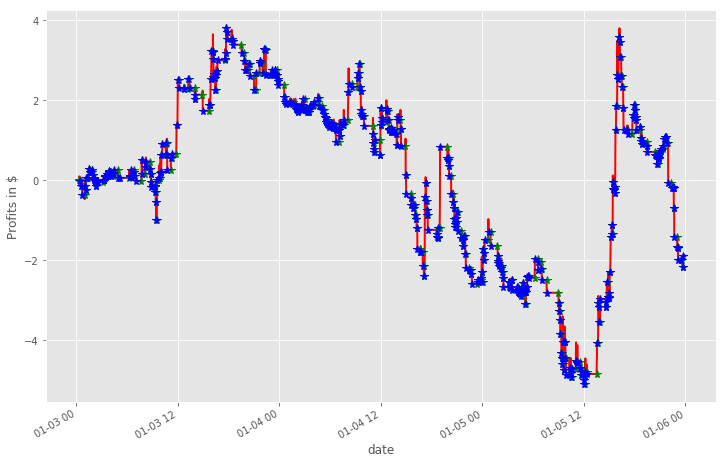

In [8]:

# In[10]:


import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111, ylabel='Profits in $')
data['total'].plot(ax=ax1, color='r', lw=2.)

# Placing markers for our position entry
ax1.plot(data.loc[data.position == 1.0].index,
data.total[data.position == 1.0],
'*', markersize=8, color='g')

# Placing markers for our position exit
ax1.plot(data.loc[data.position == -1.0].index,
data.total[data.position == -1.0],
'*', markersize=8, color='b')
plt.show()